# Nature Conservancy Fisheries Contest

In [1]:
#import modules
from utils import *
from vgg16 import Vgg16

data_path = '/mnt/azurefs/data/fisheries/'
train_path = data_path + 'train/'
test_path = data_path + 'test_stg1/'

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
/home/slaterc/anaconda3/envs/py27/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)
Using Theano backend.


In [3]:
vgg = Vgg16()

/home/slaterc/anaconda3/envs/py27/lib/python2.7/site-packages/keras/layers/core.py:621: UserWarning: `output_shape` argument not specified for layer lambda_1 and cannot be automatically inferred with the Theano backend. Defaulting to output shape `(None, 3, 224, 224)` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))


In [4]:
batch_size=64
batches = vgg.get_batches(train_path, batch_size=batch_size)

Found 3777 images belonging to 8 classes.


In [38]:
# training set distribution
classes = [ item for item in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, item)) ]
for c in classes:
    DIR = train_path + c + '/'
    print c, len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))])

OTHER 299
DOL 117
BET 200
YFT 734
NoF 465
LAG 67
SHARK 176
ALB 1719


ALB/img_00820.jpg
(1280, 720)


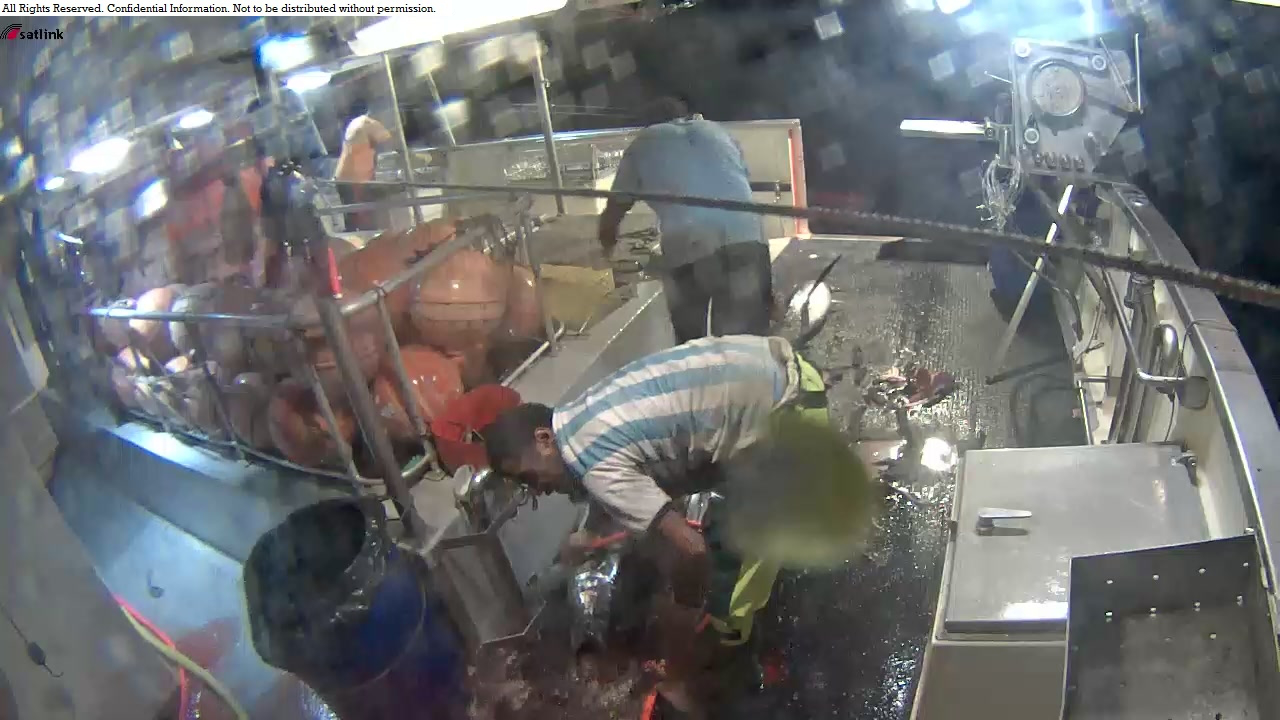

In [46]:
from PIL import Image
import random

# randomly look at training image
image_path = random.choice(batches.filenames)
print(image_path)
print(Image.open(train_path + image_path).size)
Image.open(train_path + image_path)


In [15]:
batch_size=64
test_batches = vgg.get_batches(test_path, batch_size=batch_size)

Found 1000 images belonging to 1 classes.


unknown/img_06732.jpg
(1280, 750)


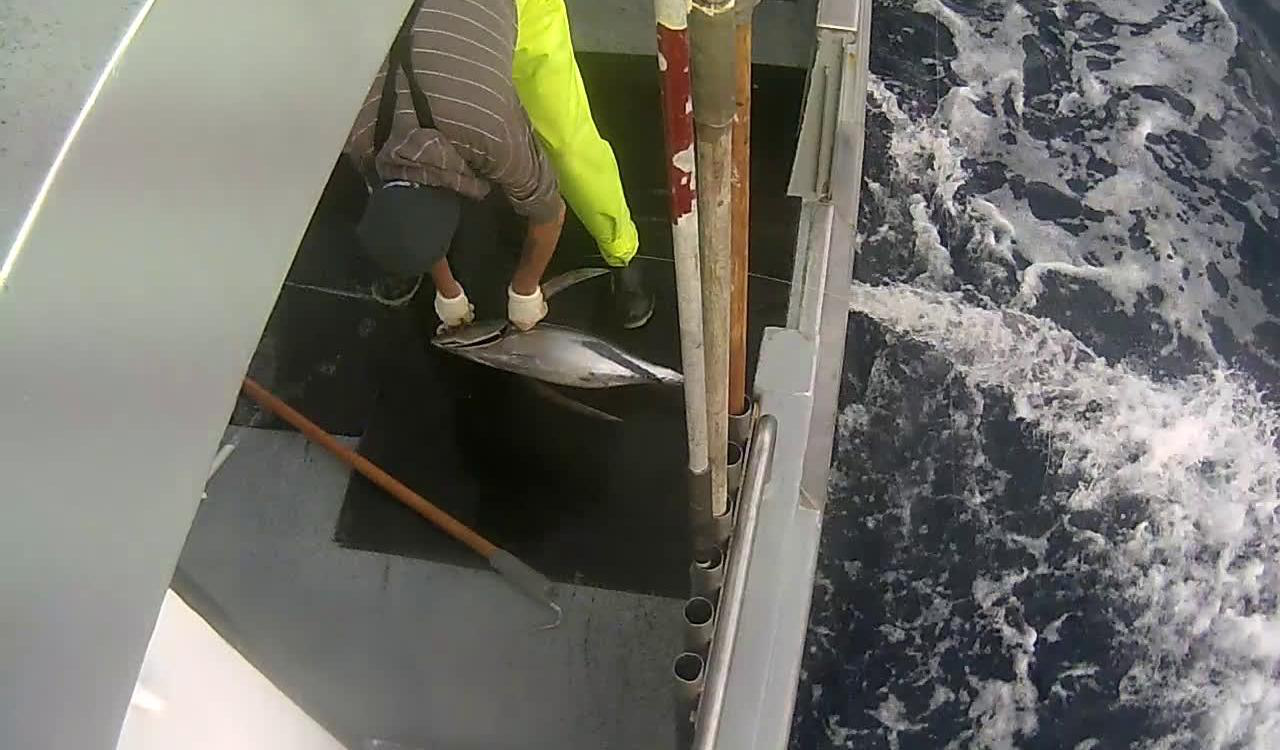

In [24]:
# randomly look at test image
image_path = random.choice(test_batches.filenames)
print(image_path)
print(Image.open(test_path + image_path).size)
Image.open(test_path + image_path)

LAG/img_01221.jpg
(1280, 720)


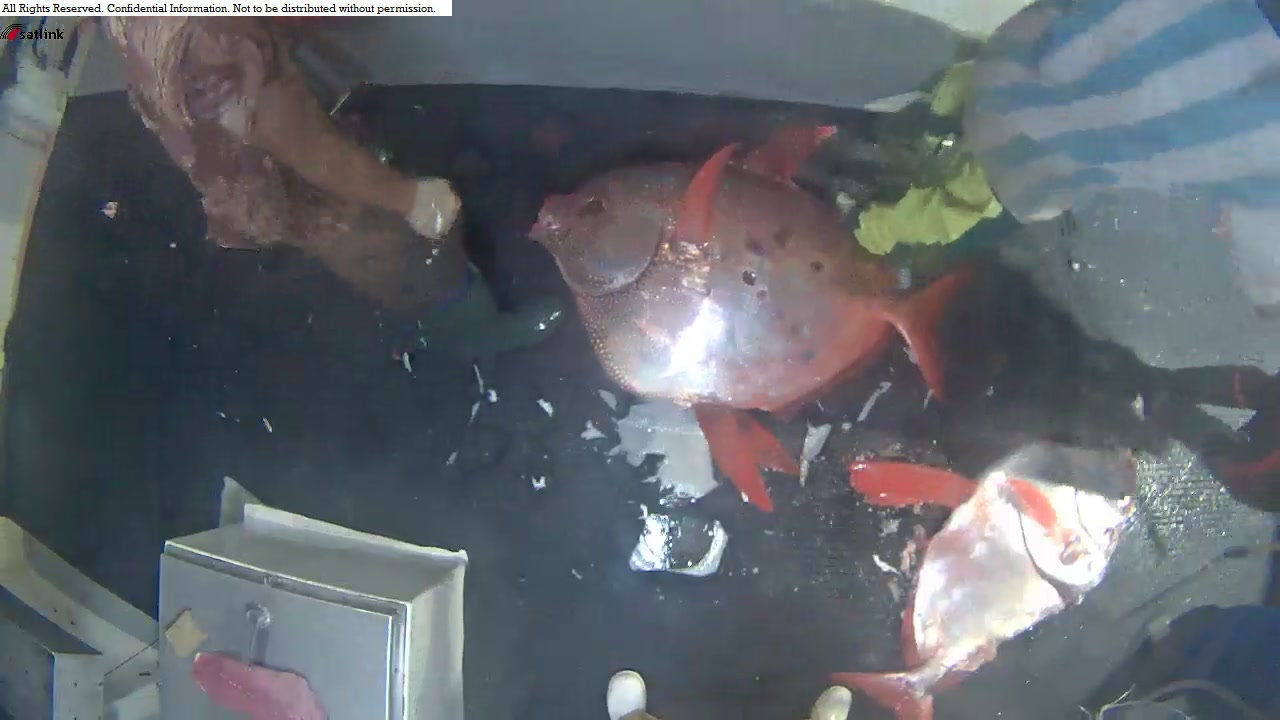

In [97]:
# random select train image from class
c = 'LAG'  # ALB, BET, DOL, YFT, OTHER, SHARK, NoF, LAG
filename_subset = [filename for filename in batches.filenames if c in filename]
image_path = random.choice(filename_subset)
print(image_path)
print(Image.open(train_path + image_path).size)
Image.open(train_path + image_path) 

In [2]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
f1 = 'LAG/img_04297.jpg'
f2 = 'LAG/img_01221.jpg'
img1 = img_to_array(load_img(train_path + f1))
img2 = img_to_array(load_img(train_path + f2))

In [3]:

from skimage.measure import structural_similarity as ssim
from skimage.measure import compare_ssim
from skimage import io

In [5]:
img1 = io.imread(train_path + f1)
img2 = io.imread(train_path + f2)
compare_ssim(img1, img1, multichannel=True)

/home/slaterc/anaconda3/envs/py27/lib/python2.7/site-packages/skimage/measure/_structural_similarity.py:224: skimage_deprecation: Call to deprecated function ``structural_similarity``. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,
/home/slaterc/anaconda3/envs/py27/lib/python2.7/site-packages/skimage/measure/_structural_similarity.py:224: skimage_deprecation: Call to deprecated function ``structural_similarity``. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,
/home/slaterc/anaconda3/envs/py27/lib/python2.7/site-packages/skimage/measure/_structural_similarity.py:224: skimage_deprecation: Call to deprecated function ``structural_similarity``. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


1.0

In [4]:
import skimage
skimage.__version__

'0.12.3'

In [7]:
img1.shape

(720, 1280, 3)